## Load Data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
receivals = pd.read_csv('../../data/kernel/receivals.csv')
purchase_orders = pd.read_csv('../../data/kernel/purchase_orders.csv')

# Convert date_arrival to datetime
receivals["date_arrival"] = pd.to_datetime(
    receivals["date_arrival"], errors="coerce", utc=True
)

## General Info

### Print head Receivals

In [31]:
# Check first few rows of the datasets
print(receivals.head())

   rm_id  product_id  purchase_order_id  purchase_order_item_no  \
0  365.0  91900143.0           208545.0                    10.0   
1  365.0  91900143.0           208545.0                    10.0   
2  365.0  91900143.0           208490.0                    10.0   
3  365.0  91900143.0           208490.0                    10.0   
4  379.0  91900296.0           210435.0                    20.0   

   receival_item_no  batch_id              date_arrival receival_status  \
0                 1       NaN 2004-06-15 11:34:00+00:00       Completed   
1                 2       NaN 2004-06-15 11:34:00+00:00       Completed   
2                 1       NaN 2004-06-15 11:38:00+00:00       Completed   
3                 2       NaN 2004-06-15 11:38:00+00:00       Completed   
4                 1       NaN 2004-06-15 11:40:00+00:00       Completed   

   net_weight  supplier_id  
0     11420.0        52062  
1     13760.0        52062  
2     11281.0        50468  
3     13083.0        50468  
4

### Print head Purchase orders

Can see some NaN values for unit_id and unit

In [32]:
print(purchase_orders.head())

   purchase_order_id  purchase_order_item_no  quantity  \
0                  1                       1     -14.0   
1                 22                       1   23880.0   
2                 41                       1       0.0   
3                 61                       1       0.0   
4                141                      10   25000.0   

                        delivery_date  product_id  product_version  \
0  2003-05-12 00:00:00.0000000 +02:00    91900143                1   
1  2003-05-27 00:00:00.0000000 +02:00    91900160                1   
2  2004-03-08 00:00:00.0000000 +01:00    91900143                1   
3  2004-03-10 00:00:00.0000000 +01:00    91900143                1   
4  2004-10-28 00:00:00.0000000 +02:00    91900143                1   

                    created_date_time                  modified_date_time  \
0  2003-05-12 10:00:48.0000000 +00:00  2004-06-15 06:16:18.0000000 +00:00   
1  2003-05-27 12:42:07.0000000 +00:00  2012-06-29 09:41:13.0000000 +00:00   

### Info on Receivals

High amount of null values for batch_id

In [33]:
# Check information about the datasets
print(receivals.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122590 entries, 0 to 122589
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   rm_id                   122533 non-null  float64            
 1   product_id              122533 non-null  float64            
 2   purchase_order_id       122537 non-null  float64            
 3   purchase_order_item_no  122537 non-null  float64            
 4   receival_item_no        122590 non-null  int64              
 5   batch_id                64765 non-null   float64            
 6   date_arrival            122590 non-null  datetime64[ns, UTC]
 7   receival_status         122590 non-null  object             
 8   net_weight              122522 non-null  float64            
 9   supplier_id             122590 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(6), int64(2), object(1)
memory usage: 9.4+ MB
None


### Info on Purchase orders

A few null values for modified_date_time, unit_id and unit. No null values for the rest

In [34]:
print(purchase_orders.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33171 entries, 0 to 33170
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_order_id       33171 non-null  int64  
 1   purchase_order_item_no  33171 non-null  int64  
 2   quantity                33171 non-null  float64
 3   delivery_date           33171 non-null  object 
 4   product_id              33171 non-null  int64  
 5   product_version         33171 non-null  int64  
 6   created_date_time       33171 non-null  object 
 7   modified_date_time      32679 non-null  object 
 8   unit_id                 33127 non-null  float64
 9   unit                    33127 non-null  object 
 10  status_id               33171 non-null  int64  
 11  status                  33171 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 3.0+ MB
None


# Analyze Receivals

## Analysis of rm_id

- **Unique rm_id:** 203  
- **Materials occurring less than 10 times:** 81  
- **Mean count:** 603.61  
- **Median count:** 21.0  
- **Mode count:** 1  

Some materials occur much more often than others.  
A lot of materials occur very rare and the most common count is 1.

In [35]:
# Unique materials in receivals and their counts
print("Unique materials in Receivals:", receivals["rm_id"].nunique())
print(receivals["rm_id"].value_counts().head(10))

Unique materials in Receivals: 203
rm_id
2130.0    23621
1903.0    19337
2160.0    13507
2140.0     5343
2142.0     4625
2182.0     3370
1906.0     3112
2132.0     3100
1909.0     2697
2134.0     2677
Name: count, dtype: int64


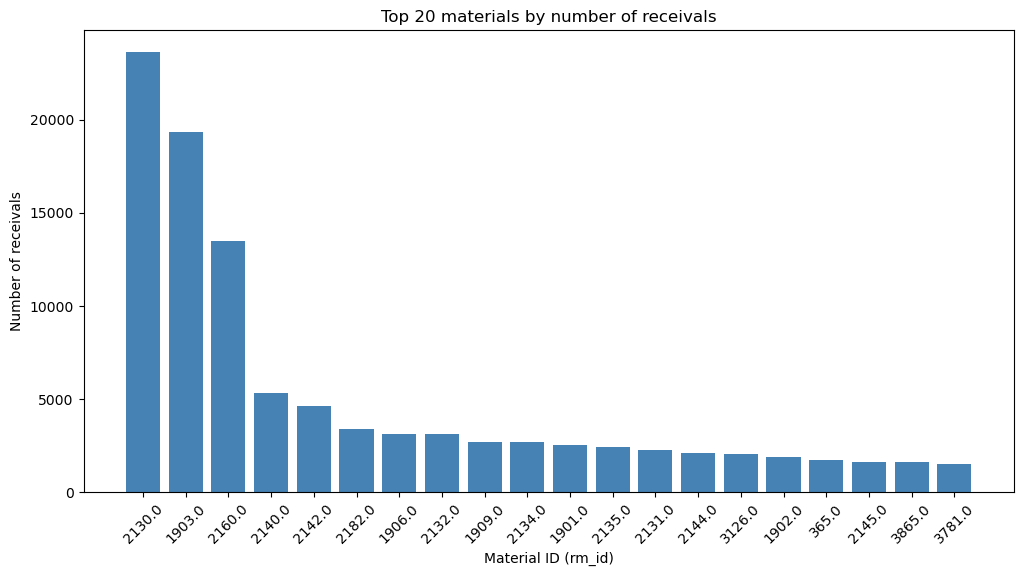

In [36]:
# Count how many times each material appears
rm_counts = receivals["rm_id"].value_counts().reset_index()
rm_counts.columns = ["rm_id", "count"]

# Select the top 20 most frequent materials
top20 = rm_counts.head(20)

# Create the plot
plt.figure(figsize=(12,6))
plt.bar(top20["rm_id"].astype(str), top20["count"], color="steelblue")
plt.title("Top 20 materials by number of receivals")
plt.xlabel("Material ID (rm_id)")
plt.ylabel("Number of receivals")
plt.xticks(rotation=45)
plt.show()


In [37]:
# How many materials occur less than 10 times
less_than_10 = (rm_counts["count"] < 10).sum()
print(f"Number of materials that occur less than 10 times: {less_than_10}")

Number of materials that occur less than 10 times: 81


In [38]:
# Mean, median, and mode of the counts
mean_count = rm_counts["count"].mean()
median_count = rm_counts["count"].median()
mode_count = rm_counts["count"].mode()[0]

print(f"Mean count: {round(mean_count, 2)}")
print(f"Median count: {median_count}")
print(f"Mode count: {mode_count}")

Mean count: 603.61
Median count: 21.0
Mode count: 1


### When were materials received?

Clear difference between pre and post 2012

Text(0, 0.5, 'Material ID (rm_id)')

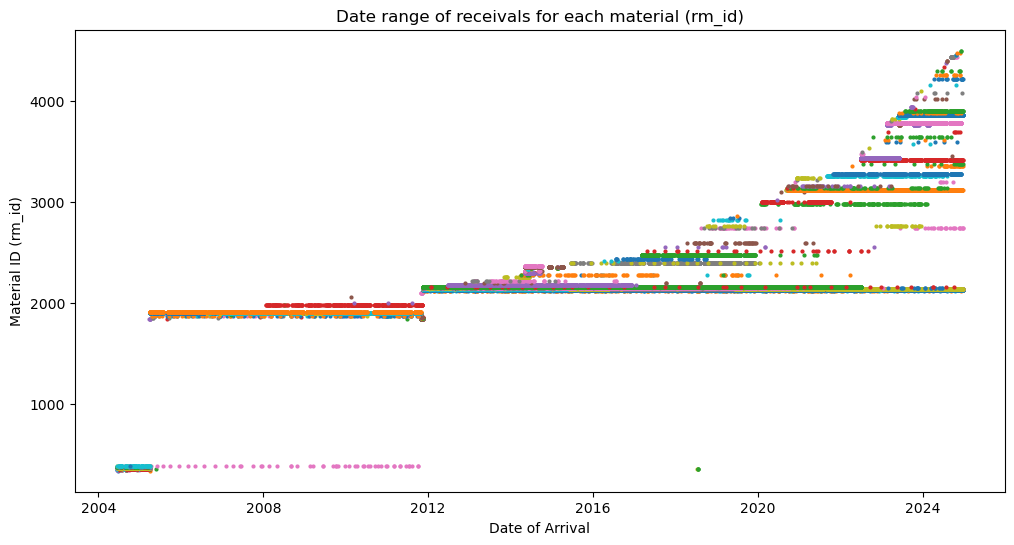

In [63]:
# Plot date range of receivals for each material
plt.figure(figsize=(12,6))
for rm_id, group in receivals.groupby("rm_id"):
    plt.plot(group["date_arrival"], [rm_id]*len(group), marker='o', linestyle='', markersize=2) 
plt.title("Date range of receivals for each material (rm_id)")
plt.xlabel("Date of Arrival")
plt.ylabel("Material ID (rm_id)")

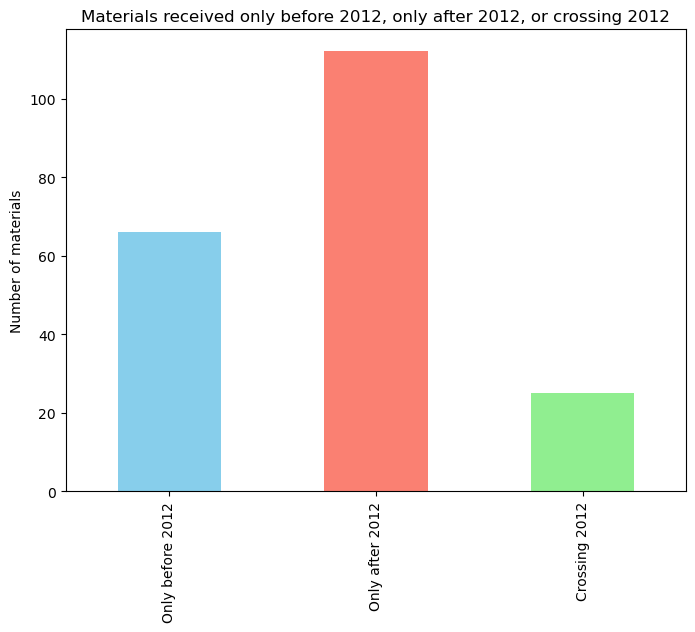

In [66]:
# Amount of materials received only before 2012 and only after 2012
material_ranges = receivals.groupby("rm_id")["date_arrival"].agg(['min', 'max']).reset_index()

only_before_2012 = (material_ranges['max'] < pd.Timestamp('2012-01-01', tz='UTC')).sum()
only_after_2012 = (material_ranges['min'] >= pd.Timestamp('2012-01-01', tz='UTC')).sum()
crossing_2012 = ((material_ranges['min'] < pd.Timestamp('2012-01-01', tz='UTC')) & (material_ranges['max'] >= pd.Timestamp('2012-01-01', tz='UTC'))).sum()

counts = pd.Series([only_before_2012, only_after_2012, crossing_2012], index=['Only before 2012', 'Only after 2012', 'Crossing 2012'])

counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], figsize=(8,6))
plt.title("Materials received only before 2012, only after 2012, or crossing 2012")
plt.ylabel("Number of materials")
plt.show()

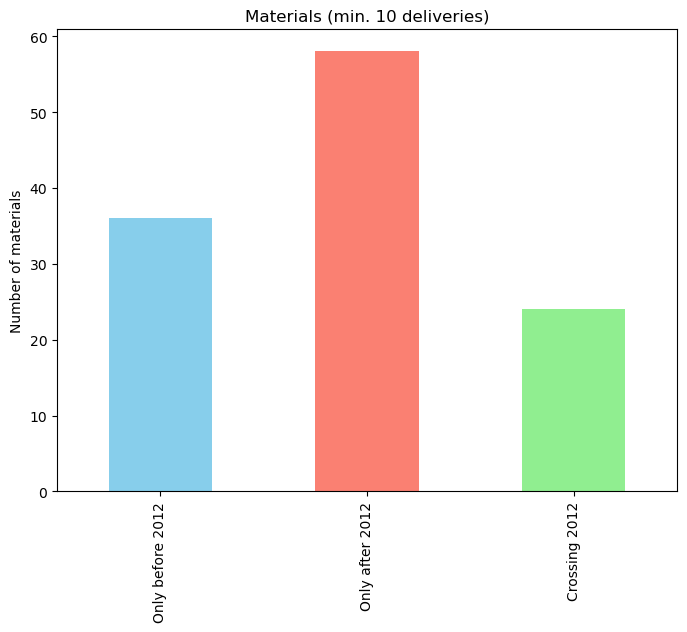

In [ ]:
# Same plot as above, but only for materials with more than 10 deliveries

# Add delivery counts
material_counts = receivals.groupby("rm_id")["date_arrival"].count().reset_index(name="n_deliveries")
material_ranges = material_ranges.merge(material_counts, on="rm_id")

# Filter
material_ranges_filtered = material_ranges[material_ranges["n_deliveries"] > 10]

# Recalculate categories
only_before_2012 = (material_ranges_filtered["max"] < pd.Timestamp("2012-01-01", tz="UTC")).sum()
only_after_2012 = (material_ranges_filtered["min"] >= pd.Timestamp("2012-01-01", tz="UTC")).sum()
crossing_2012 = ((material_ranges_filtered["min"] < pd.Timestamp("2012-01-01", tz="UTC")) &
                 (material_ranges_filtered["max"] >= pd.Timestamp("2012-01-01", tz="UTC"))).sum()

counts_filtered = pd.Series(
    [only_before_2012, only_after_2012, crossing_2012],
    index=["Only before 2012", "Only after 2012", "Crossing 2012"]
)

# Plot
counts_filtered.plot(kind="bar", color=["skyblue", "salmon", "lightgreen"], figsize=(8,6))
plt.title("Materials (min. 10 deliveries)")
plt.ylabel("Number of materials")
plt.show()


In [ ]:
# What is average "lifespan" of receivals for materials

material_ranges["lifespan_days"] = (material_ranges["max"] - material_ranges["min"]).dt.days

avg_lifespan = material_ranges["lifespan_days"].mean()

print(f"Average timespan for a material to be delivered: {avg_lifespan:.1f} days (~{avg_lifespan/365:.1f} years)")

Average timespan for a material to be delivered: 1103.3 days (~3.0 years)


## Analyze net weight values

### Distribution of total weight per material

Shows that many materials have "low" total weight

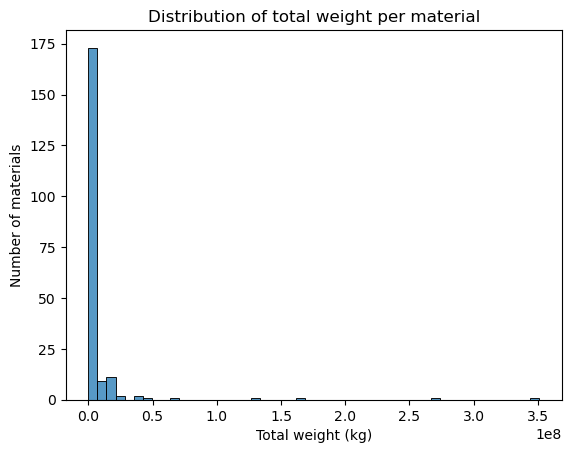

In [39]:
# Distribution of total weight per material

total_weight_all = receivals.groupby("rm_id")["net_weight"].sum()

sns.histplot(total_weight_all, bins=50)
plt.title("Distribution of total weight per material")
plt.xlabel("Total weight (kg)")
plt.ylabel("Number of materials")
plt.show()


### Top 20 materials based on total quantity delivered

Like seen before, a few materials have much higher total values

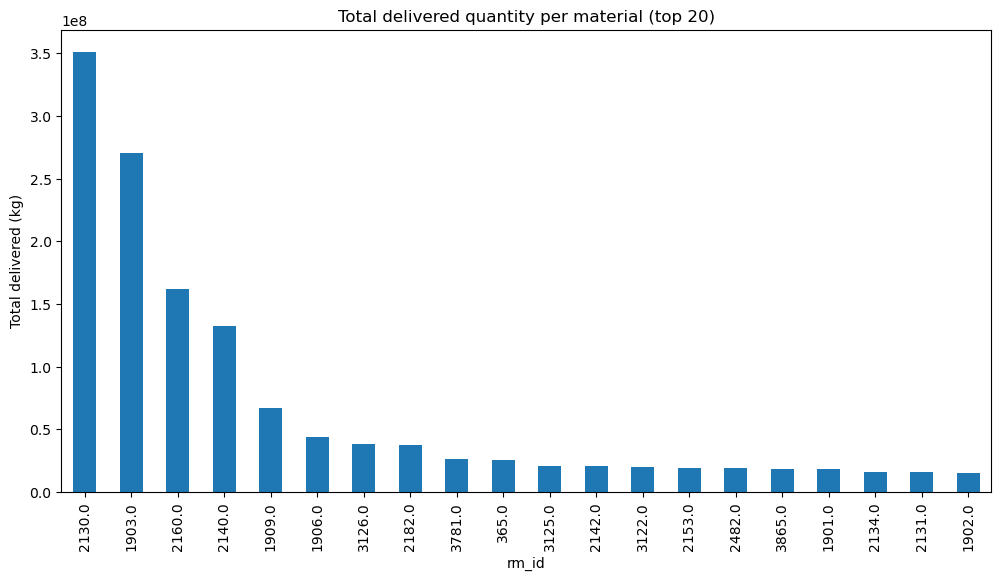

In [40]:
total_weight = receivals.groupby("rm_id")["net_weight"].sum().sort_values(ascending=False).head(20)

total_weight.plot(kind="bar", figsize=(12,6))
plt.title("Total delivered quantity per material (top 20)")
plt.xlabel("rm_id")
plt.ylabel("Total delivered (kg)")
plt.show()


### Number of Receivals vs Total weight

Looks like a natural distribution

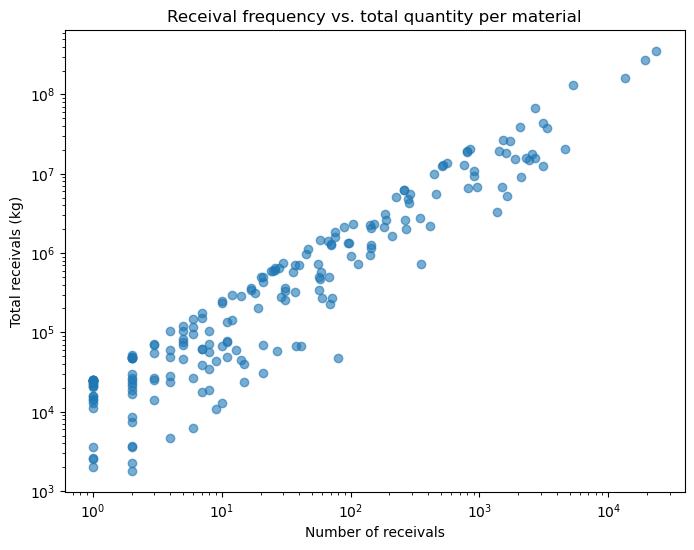

In [41]:
summary = receivals.groupby("rm_id").agg(
    total_weight=("net_weight", "sum"),
    n_deliveries=("rm_id", "count")
).reset_index()

plt.figure(figsize=(8,6))
plt.scatter(summary["n_deliveries"], summary["total_weight"], alpha=0.6)
plt.xlabel("Number of receivals")
plt.ylabel("Total receivals (kg)")
plt.title("Receival frequency vs. total quantity per material")
plt.xscale("log")  # often log-scale is better here
plt.yscale("log")
plt.show()


In [42]:
# Check date_arrival missing values and format differences
print("Missing values in date_arrival:", receivals["date_arrival"].isnull().sum())
print("Unique date formats in date_arrival:", receivals["date_arrival"].apply(lambda x: len(str(x).split('-')) if pd.notnull(x) else 0).nunique())

# Check the range of dates in date_arrival
print(receivals["date_arrival"].min())
print(receivals["date_arrival"].max())  

Missing values in date_arrival: 0
Unique date formats in date_arrival: 1
2004-06-15 11:34:00+00:00
2024-12-19 13:36:00+00:00


### Cumulative net weight values

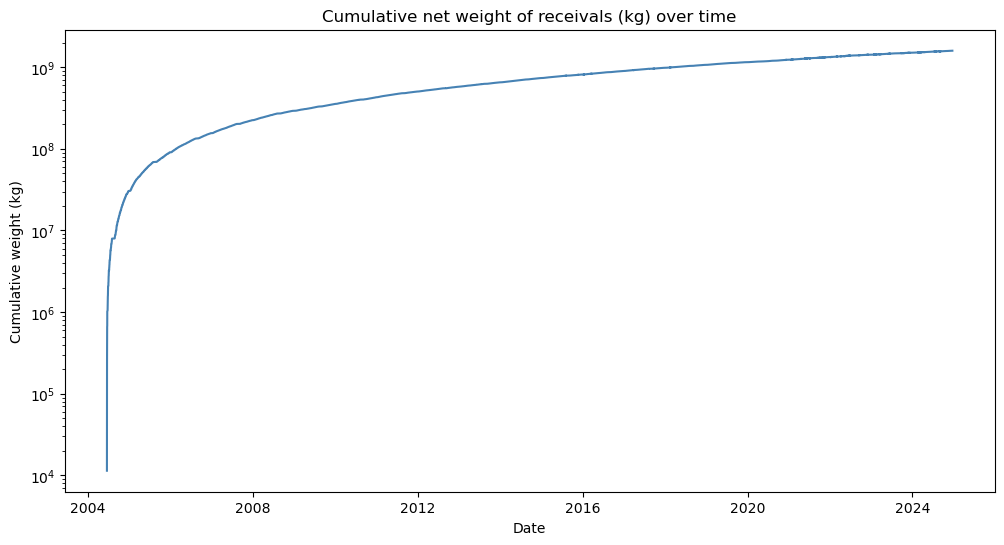

In [43]:
# Plot cumulative net weight of receivals over time 
receivals = receivals.sort_values("date_arrival")

receivals["cumulative_weight"] = receivals["net_weight"].cumsum()

plt.figure(figsize=(12,6))
plt.plot(receivals["date_arrival"], receivals["cumulative_weight"], color="steelblue")
plt.title("Cumulative net weight of receivals (kg) over time")
plt.xlabel("Date")
plt.ylabel("Cumulative weight (kg)")
plt.yscale("log")
plt.show() 

### Monthly trend

A clear monthly trend can be seen

/var/folders/25/zt8xvm6n49jczn1dmtg77nxc0000gn/T/ipykernel_43016/1490055935.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trend = receivals.groupby(receivals["date_arrival"].dt.to_period("M"))["net_weight"].sum()


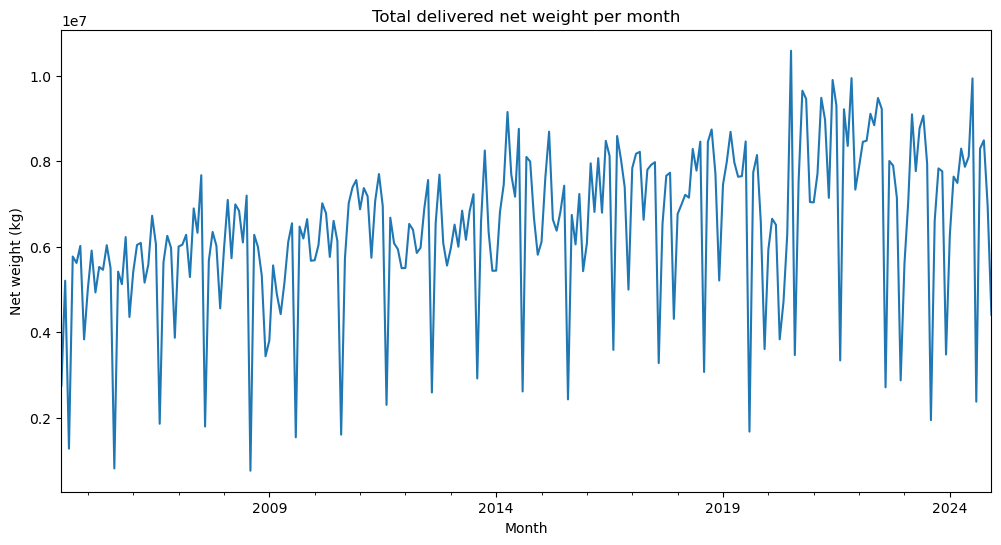

In [44]:
# Plot monthly trend of total net weight received

trend = receivals.groupby(receivals["date_arrival"].dt.to_period("M"))["net_weight"].sum()

trend.plot(figsize=(12,6))
plt.title("Total delivered net weight per month")
plt.xlabel("Month")
plt.ylabel("Net weight (kg)")
plt.show()


### Seasonality 

Shows that August has lower average than the rest.

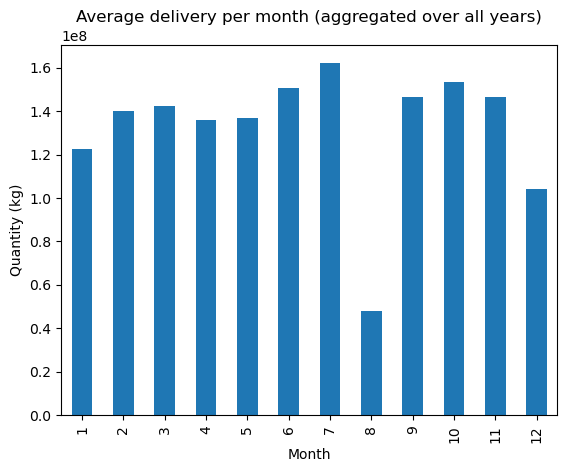

In [45]:
# Analyze seasonality by month

receivals["month"] = receivals["date_arrival"].dt.month

seasonality = receivals.groupby("month")["net_weight"].sum()

seasonality.plot(kind="bar")
plt.title("Average delivery per month (aggregated over all years)")
plt.xlabel("Month")
plt.ylabel("Quantity (kg)")
plt.show()


### Check for outliers in net weight

Looks like there are no outliers

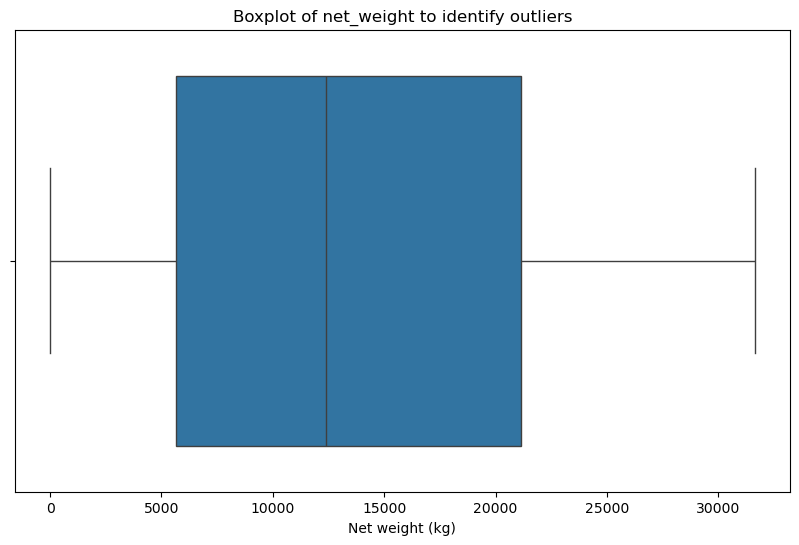

In [46]:
# Plot outliers in net_weight
plt.figure(figsize=(10,6))
sns.boxplot(x=receivals["net_weight"], showfliers=True)
plt.title("Boxplot of net_weight to identify outliers")
plt.xlabel("Net weight (kg)")
plt.show()

In [47]:
# Double check no outliers 
Q1 = receivals["net_weight"].quantile(0.25)
Q3 = receivals["net_weight"].quantile(0.75)
IQR = Q3 - Q1

outliers = receivals[
    (receivals["net_weight"] < Q1 - 1.5 * IQR) | 
    (receivals["net_weight"] > Q3 + 1.5 * IQR)
]
print(outliers.head())

print("Lower bound for net weight:", receivals["net_weight"].min())
print("Upper bound for net weight:", receivals["net_weight"].max())

Empty DataFrame
Columns: [rm_id, product_id, purchase_order_id, purchase_order_item_no, receival_item_no, batch_id, date_arrival, receival_status, net_weight, supplier_id, cumulative_weight, month]
Index: []
Lower bound for net weight: 0.0
Upper bound for net weight: 31626.0


### Moving averages of receivals (net weights)

/var/folders/25/zt8xvm6n49jczn1dmtg77nxc0000gn/T/ipykernel_43016/2832938944.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly = receivals.groupby(receivals["date_arrival"].dt.to_period("M"))["net_weight"].sum()


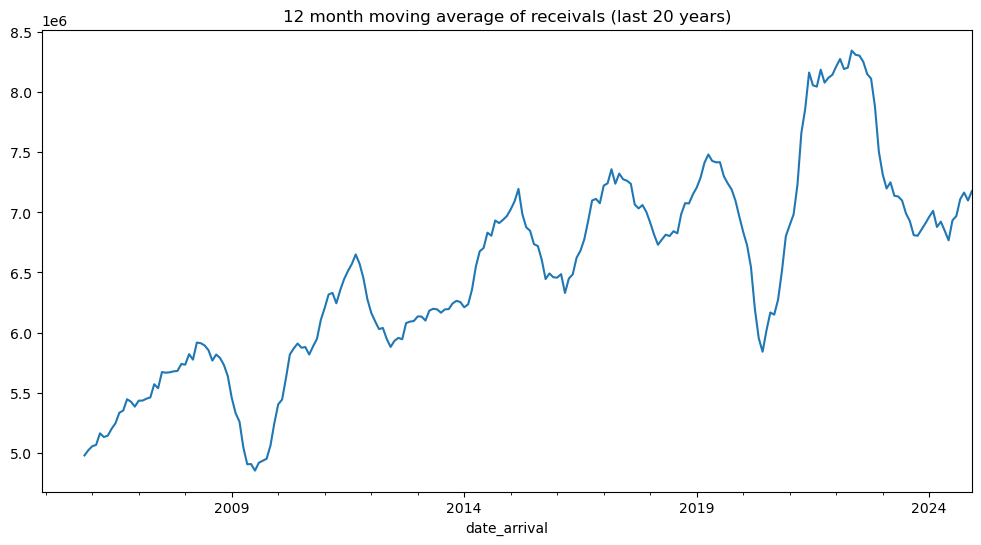

In [55]:
monthly = receivals.groupby(receivals["date_arrival"].dt.to_period("M"))["net_weight"].sum()
monthly = monthly.to_timestamp()

last_20 = monthly[monthly.index >= (monthly.index.max() - pd.DateOffset(years=20))]

last_20.rolling(12).mean().plot(figsize=(12,6))
plt.title("12 month moving average of receivals (last 20 years)")
plt.show()



/var/folders/25/zt8xvm6n49jczn1dmtg77nxc0000gn/T/ipykernel_43016/3275297737.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly = receivals.groupby(receivals["date_arrival"].dt.to_period("M"))["net_weight"].sum()


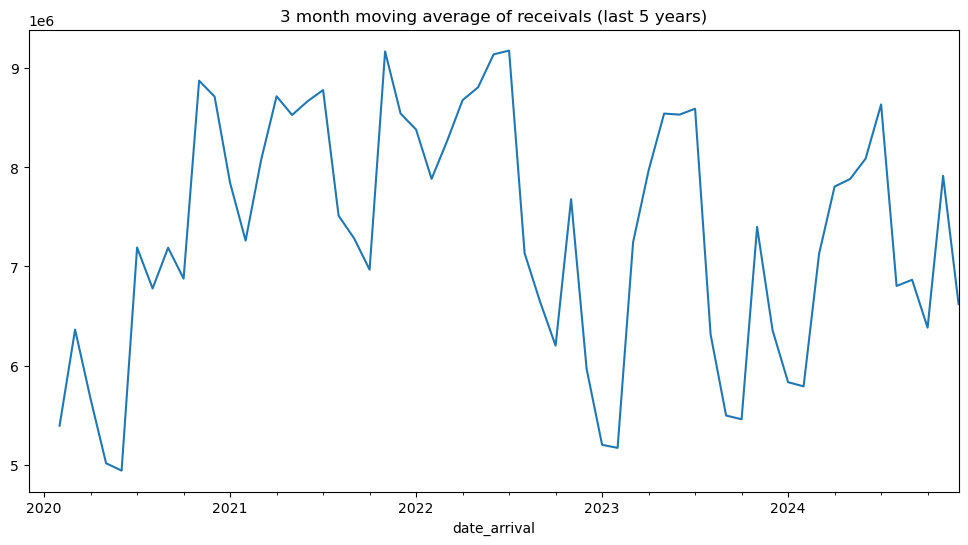

In [56]:
monthly = receivals.groupby(receivals["date_arrival"].dt.to_period("M"))["net_weight"].sum()
monthly = monthly.to_timestamp()

last_5 = monthly[monthly.index >= (monthly.index.max() - pd.DateOffset(years=5))]

last_5.rolling(3).mean().plot(figsize=(12,6))
plt.title("3 month moving average of receivals (last 5 years)")
plt.show()

### Trends for top 5 materials

2 out of 5 of the most received materials (net weight) havent been receivec since 2012

/var/folders/25/zt8xvm6n49jczn1dmtg77nxc0000gn/T/ipykernel_43016/802541046.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  receivals.groupby([receivals["date_arrival"].dt.to_period("M"), "rm_id"])["net_weight"]


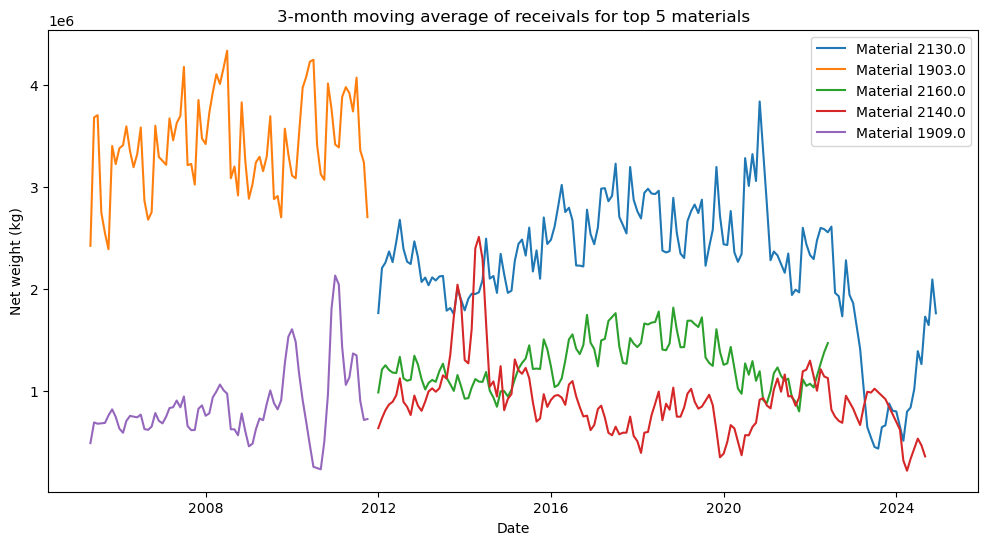

In [62]:
# Plot for top 5 most received materials over time
top_5_materials = receivals.groupby("rm_id")["net_weight"].sum().nlargest(5).index

monthly_trends = receivals[receivals["rm_id"].isin(top_5_materials)]

monthly = (
    receivals.groupby([receivals["date_arrival"].dt.to_period("M"), "rm_id"])["net_weight"]
    .sum()
    .reset_index()
)

monthly["date_arrival"] = monthly["date_arrival"].dt.to_timestamp()

plt.figure(figsize=(12,6))
for rm_id in top_5_materials:
    material_data = monthly[monthly["rm_id"] == rm_id]
    plt.plot(material_data["date_arrival"], material_data["net_weight"].rolling(3).mean(), label=f"Material {rm_id}")
plt.title("3-month moving average of receivals for top 5 materials")
plt.xlabel("Date")
plt.ylabel("Net weight (kg)")
plt.legend()
plt.show()